In [74]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [75]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [76]:
# Add the latitudes and longitudes to a list.
coordenates = list(lat_lngs)

In [77]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
        print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

new norfolk au
hermanus za
peniche pt
tsihombe mg
asbestovskiy ru
vao nc
khatanga ru
talnakh ru
ushuaia ar
gloversville us
pangai to
gornopravdinsk ru
punta arenas cl
nikolskoye ru
bur gabo so
fort saint john ca
cockburn town tc
kununurra au
mar del plata ar
mataura pf
castro cl
bambous virieux mu
arraial do cabo br
luderitz na
puerto ayora ec
kapaa us
busselton au
mataura pf
mahebourg mu
tondano id
aklavik ca
carnarvon au
butaritari ki
barrow us
hilo us
lompoc us
longlac ca
port alfred za
avarua ck
umtata za
port alfred za
tutoia br
mataura pf
ushuaia ar
colmenar viejo es
saint-philippe re
busselton au
port alfred za
ponta do sol cv
tuktoyaktuk ca
chingirlau kz
srednekolymsk ru
kasganj in
gat ly
pochutla mx
saint-philippe re
bluff nz
rikitea pf
ushuaia ar
quatre cocos mu
ushuaia ar
bambous virieux mu
rikitea pf
tsihombe mg
port hardy ca
airai pw
mangrol in
mataura pf
hirara jp
bredasdorp za
bambous virieux mu
novoagansk ru
bilibino ru
nikolskoye ru
anadyr ru
ushuaia ar
pevek ru
ushuai

east london za
pevek ru
punta arenas cl
ozu jp
ribeira grande pt
bara sd
vaini to
jamestown sh
terrytown us
barrow us
kapaa us
souillac mu
ushuaia ar
new norfolk au
busselton au
atuona pf
illoqqortoormiut gl
bluff nz
atuona pf
hermanus za
vaini to
thinadhoo mv
pierre us
dingle ie
butaritari ki
bogovarovo ru
diapaga bf
broome au
henties bay na
icara br
trincomalee lk
saleaula ws
burns lake ca
busselton au
tiarei pf
huron us
busselton au
vagur fo
villa maria ar
castro cl
kodiak us
marawi sd
laguna br
ponta do sol cv
rikitea pf
codrington ag
kruisfontein za
flin flon ca
lorengau pg
ushuaia ar
margate za
broome au
maniitsoq gl
banjarmasin id
opuwo na
rikitea pf
avarua ck
nizhneyansk ru
nikolskoye ru
lata sb
kuusamo fi
mahebourg mu
mataura pf
puerto ayora ec
cosala mx
sitka us
ixtapa mx
port elizabeth za
vanderhoof ca
port elizabeth za
green river us
butaritari ki
port alfred za
ushuaia ar
hermanus za
tuktoyaktuk ca
ushuaia ar
lagoa pt
baykit ru
busselton au
asfi ma
yellowknife ca
avarua ck

busselton au
pevek ru
lavrentiya ru
farias brito br
bredasdorp za
prince rupert ca
mataura pf
illoqqortoormiut gl
cairns au
grootfontein na
tabou ci
port alfred za
pevek ru
punta arenas cl
ancud cl
lompoc us
tumannyy ru
altay cn
punta arenas cl
georgetown sh
maragogi br
tiksi ru
komsomolskiy ru
krasnoselkup ru
lumphat kh
valparaiso cl
christchurch nz
illoqqortoormiut gl
clyde river ca
belushya guba ru
pacific grove us
new norfolk au
guerrero negro mx
beira mz
nizhneyansk ru
albany au
bathsheba bb
marzuq ly
cayenne gf
yellowknife ca
gorno-chuyskiy ru
victoria sc
ushuaia ar
mar del plata ar
taoudenni ml
yulara au
ponta do sol cv
ulety ru
albany au
cabedelo br
upernavik gl
punta arenas cl
punta arenas cl
wageningen sr
saleaula ws
chemainus ca
tuy hoa vn
cidreira br
jamestown sh
kaitangata nz
bluff nz
hobart au
tonj sd
cidreira br
hermanus za
iqaluit ca
puerto ayora ec
port alfred za
busselton au
esil kz
storsteinnes no
hithadhoo mv
riyadh sa
enumclaw us
kavieng pg
jalu ly
cape town za
isl

In [78]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [79]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [80]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [81]:
# Loop through all the cities in our list.
# for i in range(len(cities)):
# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list.    
for i, city in enumerate(cities):  

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | peniche
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | asbestovskiy
Processing Record 6 of Set 1 | vao
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | gloversville
Processing Record 11 of Set 1 | pangai
Processing Record 12 of Set 1 | gornopravdinsk
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 16 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | bamb

Processing Record 35 of Set 4 | tasiilaq
Processing Record 36 of Set 4 | harrisonburg
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | abeche
Processing Record 39 of Set 4 | krasnokamensk
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | port hedland
Processing Record 42 of Set 4 | nampa
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | staunton
Processing Record 45 of Set 4 | dolores
Processing Record 46 of Set 4 | meulaboh
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | okha
Processing Record 49 of Set 4 | wajima
Processing Record 50 of Set 4 | puerto asis
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | cap malheureux
Processing Record 3 of Set 5 | cascais
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | yurla
Processing Record 6 of Set 5 | hegang
Processing Record 7 of Set 5 | taolanaro
City not found. Skipping

Processing Record 26 of Set 8 | trincomalee
Processing Record 27 of Set 8 | burns lake
Processing Record 28 of Set 8 | tiarei
Processing Record 29 of Set 8 | huron
Processing Record 30 of Set 8 | vagur
Processing Record 31 of Set 8 | villa maria
Processing Record 32 of Set 8 | marawi
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | maniitsoq
Processing Record 36 of Set 8 | banjarmasin
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | lata
Processing Record 39 of Set 8 | kuusamo
Processing Record 40 of Set 8 | cosala
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | vanderhoof
Processing Record 43 of Set 8 | green river
Processing Record 44 of Set 8 | baykit
Processing Record 45 of Set 8 | asfi
Processing Record 46 of Set 8 | tagab
Processing Record 47 of Set 8 | ivanteyevka
Processing Record 48 of Set 8 | price
Processing Record 49 of Set 8 | itoman
Processing Record 50 of Set 8 | lok

Processing Record 12 of Set 12 | bandiagara
Processing Record 13 of Set 12 | omboue
Processing Record 14 of Set 12 | bandarbeyla
Processing Record 15 of Set 12 | trelew
Processing Record 16 of Set 12 | chapais
Processing Record 17 of Set 12 | temaraia
City not found. Skipping...
Processing Record 18 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 12 | farias brito
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | grootfontein
Processing Record 22 of Set 12 | ancud
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | maragogi
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | lumphat
Processing Record 27 of Set 12 | valparaiso
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | pacific grove
Processing Record 30 of Set 12 | beira
Processing Record 31 of Set 12 | marzuq
Processing Record 32 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 

In [82]:
len(city_data)

554

In [83]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,56.70,80,100,8.77,AU,2021-07-31 00:56:20
1,Hermanus,-34.4187,19.2345,51.91,83,0,3.78,ZA,2021-07-31 00:54:11
2,Peniche,39.3558,-9.3811,65.73,87,96,21.52,PT,2021-07-31 00:56:20
3,Asbestovskiy,57.7557,61.3967,55.74,95,100,3.74,RU,2021-07-31 00:56:21
4,Vao,-22.6667,167.4833,67.93,55,0,24.09,NC,2021-07-31 00:56:21
5,Khatanga,71.9667,102.5000,81.86,35,1,16.91,RU,2021-07-31 00:56:22
6,Talnakh,69.4865,88.3972,60.01,80,100,6.67,RU,2021-07-31 00:56:22
7,Ushuaia,-54.8000,-68.3000,37.06,70,40,3.44,AR,2021-07-31 00:56:00
8,Gloversville,43.0528,-74.3438,63.55,77,0,3.00,US,2021-07-31 00:56:23
9,Pangai,-19.8000,-174.3500,78.91,83,75,9.22,TO,2021-07-31 00:56:23


In [84]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-07-31 00:56:20,-42.7826,147.0587,56.70,80,100,8.77
1,Hermanus,ZA,2021-07-31 00:54:11,-34.4187,19.2345,51.91,83,0,3.78
2,Peniche,PT,2021-07-31 00:56:20,39.3558,-9.3811,65.73,87,96,21.52
3,Asbestovskiy,RU,2021-07-31 00:56:21,57.7557,61.3967,55.74,95,100,3.74
4,Vao,NC,2021-07-31 00:56:21,-22.6667,167.4833,67.93,55,0,24.09
5,Khatanga,RU,2021-07-31 00:56:22,71.9667,102.5000,81.86,35,1,16.91
6,Talnakh,RU,2021-07-31 00:56:22,69.4865,88.3972,60.01,80,100,6.67
7,Ushuaia,AR,2021-07-31 00:56:00,-54.8000,-68.3000,37.06,70,40,3.44
8,Gloversville,US,2021-07-31 00:56:23,43.0528,-74.3438,63.55,77,0,3.00
9,Pangai,TO,2021-07-31 00:56:23,-19.8000,-174.3500,78.91,83,75,9.22


In [85]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [86]:
# First get get Data for Plotting
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

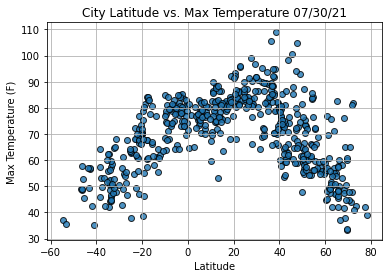

In [87]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

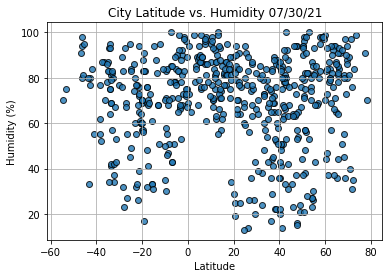

In [92]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

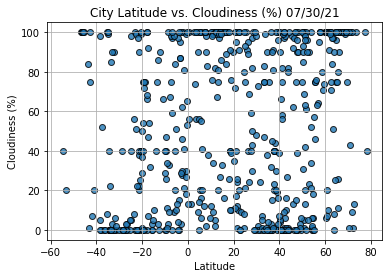

In [93]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

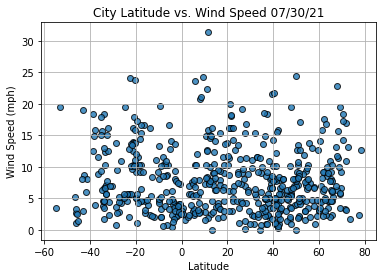

In [94]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression

In [132]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [133]:
x_values = lats
y_values = max_temps

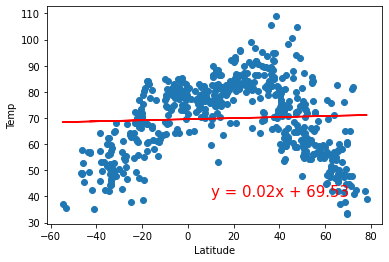

In [134]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

## Create a Linear Regression Function

In [188]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.    

In [189]:
# We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
# The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
# The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

City                Cockburn Town
Country                        TC
Date          2021-07-31 00:56:25
Lat                       21.4612
Lng                      -71.1419
Max Temp                    82.35
Humidity                       84
Cloudiness                      1
Wind Speed                  18.01
Name: 13, dtype: object

In [190]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
549     True
550     True
551     True
552    False
553    False
Name: Lat, Length: 554, dtype: bool

In [191]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Peniche,PT,2021-07-31 00:56:20,39.3558,-9.3811,65.73,87,96,21.52
3,Asbestovskiy,RU,2021-07-31 00:56:21,57.7557,61.3967,55.74,95,100,3.74
5,Khatanga,RU,2021-07-31 00:56:22,71.9667,102.5000,81.86,35,1,16.91
6,Talnakh,RU,2021-07-31 00:56:22,69.4865,88.3972,60.01,80,100,6.67
8,Gloversville,US,2021-07-31 00:56:23,43.0528,-74.3438,63.55,77,0,3.00
...,...,...,...,...,...,...,...,...,...
547,Krasnoarmeysk,RU,2021-07-31 00:59:59,51.0239,45.6969,70.29,75,96,8.32
548,Muslyumovo,RU,2021-07-31 00:59:59,55.3033,53.1947,65.08,81,57,6.78
549,Requena,ES,2021-07-31 01:00:00,39.4883,-1.1004,71.71,51,3,1.74
550,Akhmim,EG,2021-07-31 01:00:00,26.5622,31.7450,82.60,26,24,4.23


In [192]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Peniche,PT,2021-07-31 00:56:20,39.3558,-9.3811,65.73,87,96,21.52
3,Asbestovskiy,RU,2021-07-31 00:56:21,57.7557,61.3967,55.74,95,100,3.74
5,Khatanga,RU,2021-07-31 00:56:22,71.9667,102.5000,81.86,35,1,16.91
6,Talnakh,RU,2021-07-31 00:56:22,69.4865,88.3972,60.01,80,100,6.67
8,Gloversville,US,2021-07-31 00:56:23,43.0528,-74.3438,63.55,77,0,3.00


In [193]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Linear Regression on the Northern and South Hemisphere
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.44 for the Northern Hemisphere and greater than 0.77 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

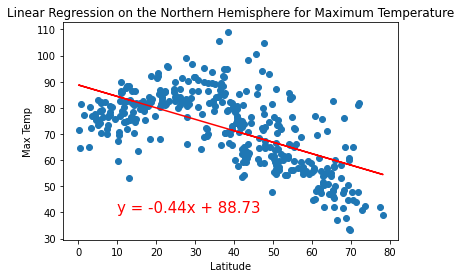

y = 0.02x + 69.53
The p-value is: 0.276
The r-value is: 0.046


In [224]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

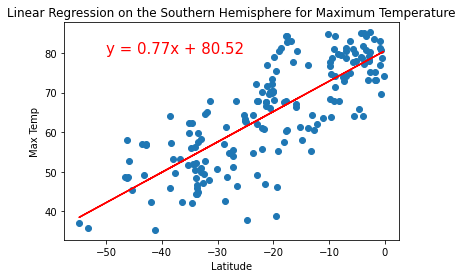

y = 0.02x + 69.53
The p-value is: 0.276
The r-value is: 0.046


In [223]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", 'Max Temp',(-50,80))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

## Linear Regressions by % of Humidity
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

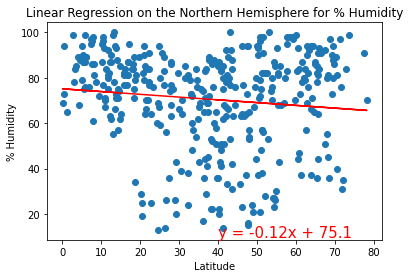

y = 0.02x + 69.53
The p-value is: 0.276
The r-value is: 0.046


In [217]:
# Linear regression on the Northern Hemisphere for % of Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", '% Humidity',(40,10))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

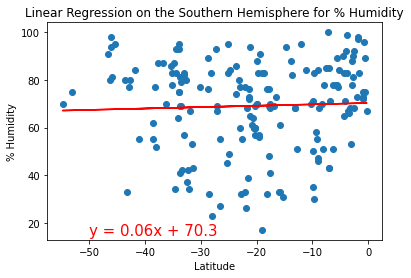

y = 0.02x + 69.53
The p-value is: 0.276
The r-value is: 0.046


In [218]:
# Linear regression on the Southern Hemisphere by % of Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

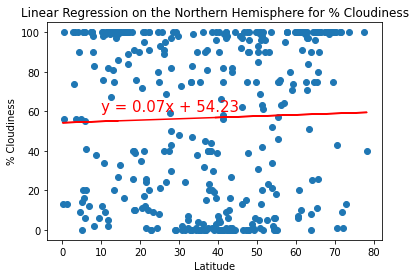

In [219]:
# Linear regression on the nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

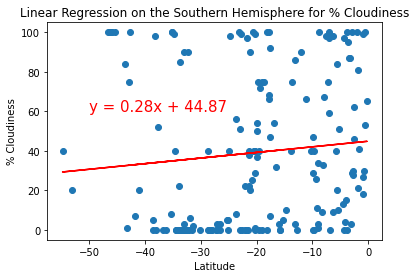

In [220]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

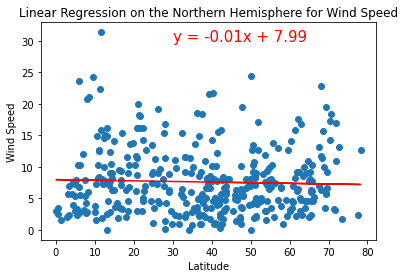

In [221]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (30,30))

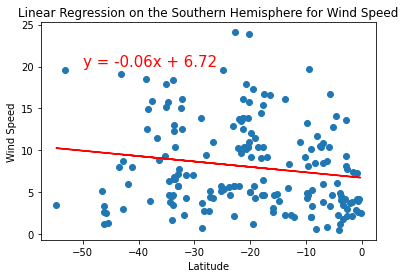

In [222]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))